# Learning Rate Finder

In [ ]:
from fastai.gen_doc.nbdoc import *
from fastai import *
from fastai.vision import *

Learning rate finder plots lr vs loss relationship for a [`Learner`](/basic_train#Learner). The idea is to reduce the amount of guesswork on picking a good starting learning rate.

**Overview:**  
1. First run lr_find `learn.lr_find()`
2. Plot the learning rate vs loss `learn.recorder.plot()`
3. Pick a learning rate before it diverges then start training

**Technical Details:** (first [described]('https://arxiv.org/abs/1506.01186') by Leslie Smith)  
>Train [`Learner`](/basic_train#Learner) over a few iterations. Start with a very low `start_lr` and change it at each mini-batch until it reaches a very high `end_lr`. [`Recorder`](/basic_train#Recorder) will record the loss at each iteration. Plot those losses against the learning rate to find the optimal value before it diverges.

## Choosing a good learning rate

For a more intuitive explanation, please check out [Sylvain Gugger's post](https://sgugger.github.io/how-do-you-find-a-good-learning-rate.html)

In [ ]:
data = URLs.get_mnist()
def simple_learner(): return Learner(data, simple_cnn((3,16,16,2)), metrics=[accuracy])
learn = simple_learner()

First we run this command to launch the search:

In [ ]:
show_doc(Learner.lr_find)

#### <a id=lr_find></a>`lr_find`
> `lr_find`(`learn`:[`Learner`](/basic_train#Learner), `start_lr`:`Floats`=`1e-07`, `end_lr`:`Floats`=`10`, `num_it`:`int`=`100`, `kwargs`:`Any`)


Explore lr from `start_lr` to `end_lr` over `num_it` iterations in `learn`.  <a href="https://github.com/fastai/fastai/blob/master/fastai/train.py#L21">[source]</a>

In [ ]:
learn.lr_find()

Then we plot the loss versus the learning rates. We're interested in finding a good order of magnitude of learning rate, so we plot with a log scale. 

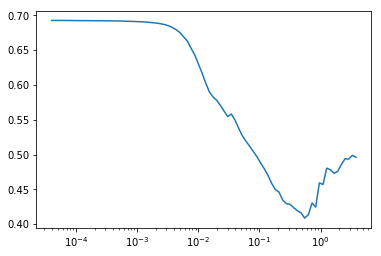

In [ ]:
learn.recorder.plot()

Then, we choose a value that is an order of magnitude before the mimum: the minimum value is on the edge diverging so it is too high. An order of magnitude before, a value that's still aggressive (for quicker training) but still safer from exploding. (In this example case 1e-1 is a good choice).

Let's start training with this optimal value:

In [ ]:
simple_learner().fit_one_cycle(2, 1e-1)

Total time: 00:04
epoch  train loss  valid loss  accuracy
0      0.109441    0.073346    0.973994  (00:02)
1      0.041229    0.041595    0.984298  (00:02)



Picking the minimum isn't a good idea because training will diverge.

In [ ]:
learn = simple_learner()
simple_learner().fit_one_cycle(2, 1e-0)

Total time: 00:04
epoch  train loss  valid loss  accuracy
0      0.446117    0.478633    0.495584  (00:02)
1      0.429263    0.431671    0.495584  (00:02)



Picking a value to far below the minimum isn't optimal because training is too slow.

In [ ]:
learn = simple_learner()
simple_learner().fit_one_cycle(2, 1e-2)

Total time: 00:04
epoch  train loss  valid loss  accuracy
0      0.140804    0.103993    0.965162  (00:02)
1      0.070876    0.058954    0.977429  (00:02)



In [ ]:
show_doc(LRFinder)

## <a id=LRFinder></a>`class` `LRFinder`
> `LRFinder`(`learn`:[`Learner`](/basic_train#Learner), `start_lr`:`float`=`1e-07`, `end_lr`:`float`=`10`, `num_it`:`int`=`100`) :: [`LearnerCallback`](/basic_train#LearnerCallback)


Causes `learn` to go on a mock training from `start_lr` to `end_lr` for `num_it` iterations. Training is interrupted if the loss diverges. Weights changes are reverted after run complete. <a href="https://github.com/fastai/fastai/blob/master/fastai/callbacks/lr_finder.py#L9">[source]</a>

In [ ]:
show_doc(LRFinder.on_train_end)

#### <a id=LRFinder.on_train_end></a>`on_train_end`
> `on_train_end`(`kwargs`:`Any`)


Cleanup learn model weights disturbed during LRFind exploration.  <a href="https://github.com/fastai/fastai/blob/master/fastai/callbacks/lr_finder.py#L42">[source]</a>

In [ ]:
show_doc(LRFinder.on_batch_end)

#### <a id=LRFinder.on_batch_end></a>`on_batch_end`
> `on_batch_end`(`iteration`:`int`, `smooth_loss`:`TensorOrNumber`, `kwargs`:`Any`)


Determine if loss has runaway and we should stop.  <a href="https://github.com/fastai/fastai/blob/master/fastai/callbacks/lr_finder.py#L29">[source]</a>

In [ ]:
show_doc(LRFinder.on_train_begin)

#### <a id=LRFinder.on_train_begin></a>`on_train_begin`
> `on_train_begin`(`kwargs`:`Any`)


Initialize optimizer and learner hyperparameters.  <a href="https://github.com/fastai/fastai/blob/master/fastai/callbacks/lr_finder.py#L22">[source]</a>

In [ ]:
show_doc(LRFinder.on_epoch_end)

#### <a id=LRFinder.on_epoch_end></a>`on_epoch_end`
> `on_epoch_end`(`kwargs`:`Any`)


Tell Learner if we need to stop.  <a href="https://github.com/fastai/fastai/blob/master/fastai/callbacks/lr_finder.py#L38">[source]</a>